## Introduction
In this project we will look at the different sources of the decoherence of the qubit spin 1/2. The sources that we will look at are: pure dephasing, pure decay and therminal decoherence. 

##  Description of the physical problem we want to simulate


The pure dephasing happens when the qubit spin 1/2 is placed in a magnetic field that fluctuates in time and we assume that there is no other intoraction with the system. The fluctuations lead to the fluctuations in larmor frequency $\omega_l = g\mu_bB_o$ of the spin 1/2. If we look at the frequency domain we will observe laurensian shape of the frequency around wl. This variance in the frequency denotes the uncertainty as time goes on it becomes harder to know what frequency of the 1/2 spin qubit is. "Classically" you can imagine this as a pendalum with a dampening that changes in time. Since we aren't measuring it you can also imagine a box covering the pandelum. Since the dampening factor changes in time it becomes very difficult to know what the current frequency is. Ofcource eventually it becomes zero due to dampening over time, however this can be ignored for this example. As it is known from 1/2 spin qubits there exist pure, mixed en completely mixed. The meaning behind this as you go from pure towards mixed you know less about the 1/2 spin qubits and when you reach completely mixed you know nothing more about the 1/2 spin qubit. Decoherence means that the off-diagonal of a state are 0. Mixed states have the characteristic of having off diagonals of zero. So just like the "classical" example for a pandalum the phase of the 1/2 spin qubit becomes less certain over time due to the fluctuating magnetic field. As a result the off diagonls of the spins density matrix heads towards zero.          

The pure deacaying happens when the spin 1/2 decays with some decay rate from the exited state to ground state. In this case we have a non fluctuating magnetic field. However in this case we are going to measure the  1/2 spin qubit. We will want to know if it is a spin up or spin down. The question arraies how it is lead to dephasing?. You can measure the spin up or spin down of a photon in a magnetic field. Due to the fact that you are measuring it you will collaps it. The collaps operator is depends on if you are measuring spin up or spin down. If the initial state is spin up, due to colapse operator the average over time will be spin down. Before measurement the 1/2 spin had a fixed frequency, due to the fact that the magnetic field is not fluctuating. Measurement adds a form of exponantial decay, the decay explains how the diagonals change over time. Therefor the total representation of the wave function is $\phi=e^{-a}*cos(b)$. The a and b are arbitrary.The exponential does not change the phase only the magnitute. However if the Fourier transform is preform on $\phi$ the result is a pulse. This means that the frequency of the 1/2 spin qubit in the perfect magnetic field changes due to measurement. As the case with the fluctuating magnetic field as you keep measuring the spin the state will eventually be pure mixed. It is also important to note that for pure decay the condintion $T_2 = 2T_1$ have to be met, where T1 and T2 are respectivly decay period of the diagonal and off-diagonal elements of the density matrix  shown below. 

$$
\textbf{$\rho$} = 
\begin{pmatrix}
\rho_{11}e^{-1/T_1}\ \rho_{12}e^{-1/T_2}\\
\rho_{21}e^{-1/T_2}\ \rho_{22}e^{-1/T_1}
\end{pmatrix}
$$

The last source of decoherence we are going to look at is envoiremental i.e 'thermal bath'. The  1/2 spin qubit in the enviroment can give energy to it ,but it can also absorb energy from it. If the temerature is zero. The 1/2 spin qubit can only take energy and if the temperature approaches infinity we would assume that the qubit spin 1/2 would only get energy. However the boltsman statistics suggests that is not the case. When working with the envoirnment you have to use boltzman statistic as a tool to figurate the thermal occupation number or in short $n_{th}$. As taking energy can be seen as being in the excited state and giving energy can be seen as being in the ground state. Depending on the environment. As you try to measure if the 1/2 spin qubit is eiter giving or receiving energy you are once again effecting it. After a few measurements the spin will be in a completely mixed state. What's interesting about this is the rate in which the spin becomes decoherent. 


$$
n_{th} = \frac{1}{1-e^{\hbar/k_bT}}
$$

## Aim and scope of this project

With this project we are trying to understand how different sources of decoherence affect qubit spin 1/2 by finding the answerse to following questions:

1. How to simmulate pure depasing that is the result of the fluctuations of the magnetic field?
2. What is a good model of pure decay? 
3. a) What are the requerments to properly simmulate 'therminal bath' of qubit spin 1/2? 
3. b) How does the envoirment affects the decoherence of the qubit spin 1/2. 



## Techniques and approach

First the model of the qubit spin 1/2 will be created with help of `basis()` funciton. The created superposition will be normalized with `unit()`. This sate is used for all simmulation. The evolution of the state is then determined with the Linblad equation `mesolve()`, where we use collapse operators to simmualte physical enviroment. The Hamiltonian of our system is $ H =\frac{\omega_l\sigma_z}{2} $

### Simualting pure dephasing
To simmulate pire dephasing we need an collapse operator that has the eigenstate coresponding to our qubit spin 1/2. We know that forunately als a pauli matric $\sigma_z$. The total collapse operator is

$$
C_{dephasing} = \sqrt{\gamma}\sigma_z 
$$

where $\gamma$ is the collapse rate. Since we are modeling the fluctions in frequency $\Delta\omega$ we can replace $\gamma$ by $\Delta\omega$. The decoherence should decay as $e^{-\Delta\omega t}$. 


In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

N = 2                                    # Length of Hilbert Space
tmin = 0                                 # Start time of the simulation
tmax = 10                                # End time of the simulation
psi2= basis(N,0)+basis(N,1)              # Spin (/0>+/1>)
psi2= psi2.unit()                        # Spin (/0>+/1>)/sqrt(2)
delta_w = 0.1                            # Uncertainty
w_l = 1                                  #Larmor frequency
C_ops = []                               # colaps operator list
times = np.linspace(tmin,tmax,400)       #time of the simulation
C_ops = [np.sqrt(delta_w)*sigmaz()]      #Collaps operator
H = 0.5 * w_l * sigmaz()                 #Hamiltionion
result = mesolve(H, psi2, times, C_ops)  # Linkblad Equation

### Simulating pure decoherence

To simmulate pure decoherence we use collapse operator
$$
C_{decay} = \sqrt{\gamma}\sigma_-
$$
where $\gamma = \frac{1}{T_{decay}}$. $T_{decay}$ is the rate at which the quibit spin 1/2 decay from higer energy to lower energy. If we solve the linblad manually we observe that the off-diagonal elements of $\rho$ should decay as $e^{-\frac{\gamma t}{2}}$ 

In [2]:
gamma = 0.4                              #Gamma
w_l = 1                                  #Larmor frequency
C_ops = [np.sqrt(gamma)*sigmam()]        #Collaps operator
H = 0.5 * w_l * sigmaz()                 #Hamiltionion
result = mesolve(H, psi2, times, C_ops)   # Linkblad Equation

### Therminal decoherence
Since the qubit spin 1/2 gains and loses energy we will use the following collapse operators $\alpha_-\sigma_-$ and $\alpha_+\sigma_+$. The  $\alpha_+$ and  $\alpha_-$ is some function of  $n_{th}$. If T is zero then only the enviroment gains energy from spin 1/2. The $n_{th}$ is zero at that T = 0. This means that  $\alpha_+ = \sqrt{\gamma n_{th}}$ and $\alpha_- = \sqrt{\gamma (n_{th}+1)}$. The dephasing should decay with  $\gamma (n_{th}+1) + \gamma (n_{th})$

In [3]:
kb=1.38e-23                           #Boltman's constant
T=1000                                #Temperature
wl = 1                                #Larmor frequency
nther=1/(1-np.exp(wl/kb*T))           #Thermal occupation number 
H = 0.5 * wl * sigmaz()               #Hamiltionion
gamma = 0.1                           #Gamma
gamma_plus = gamma*(1+nther)          #Gamma for plus operator
gamma_minus = gamma*nther             #Gamma for minus operator

## Results
### Pure dephasing
The plot below shows the evolution of the off-diagonal elements of the $\rho$ matrix and the exponantial decay function $e^{-\Delta\omega t}$ with the collapse operator $C_{dephasing}$ where $\Delta\omega = 0.05 $ and $\omega_l = 1$. The plots shows indeed that the fluctions of the off diagonal elements dephase and the dephasing follow the exponential $e^{-\Delta\omega t}$.
<img src="Plots/pure_dephasing_offdia.png" width=60%>
### Pure decay
From the plot that is represented below we can conclude that the pure decay indeed leads to the dephasing of the system and it is only vailid when $2T_2 = T_1$. The green and the blue lines in the plot of diagonal elements are actually on top of each other  

<img src="Plots/pure_decaying.png" width=70%>
### Thermal decoherence

## Summary and Outlook  

In [4]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

Creating the qubit spin 1/2 state and defining meaningful variables for the simulations. 

In [5]:
N = 2                               # Length of Hilbert Space
tmin = 0                            # Start time of the simulation
tmax = 10                           # End time of the simulation
psi0 = basis(N, 0)                  # Spin up
psi1 = basis(N, 1)                  # Spin down
psi2 = psi0 + psi1
psi2 = psi2.unit()                  # normalization of psi0 + pis1 to get the superposition of |0>+|1> 
delta_w = 0.0                    
w_l = 0.0
C_ops = []                          #colaps operator list
times = np.linspace(tmin,tmax,400)  #time of the simulation

Now solving linblad equation for the pure dephasing and plotting the off diagonal matrix and the expontial $e^{-\Delta\omega t}$

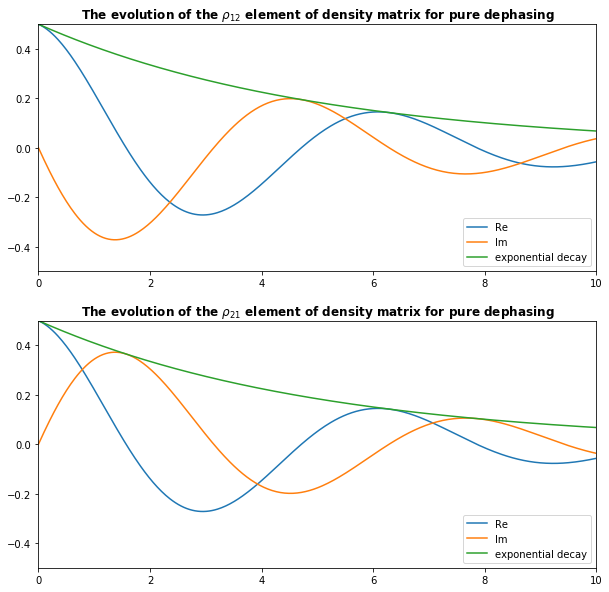

In [6]:
delta_w = 0.1
w_l = 1
C_ops = [np.sqrt(delta_w)*sigmaz()]
H = 0.5 * w_l * sigmaz()
result = mesolve(H, psi2, times, C_ops)


figure_size =  [10,10]
plt.figure(figsize = figure_size)

plt.subplot(211)
plt.title(r'The evolution of the $\rho_{12}$ element of density matrix for pure dephasing',weight="bold")
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label=r'Re');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im' );
plt.plot(times,0.5*np.exp(-2*delta_w*times), label=r'exponential decay');
plt.legend(loc = 4)

plt.subplot(212)
plt.title(r'The evolution of the $\rho_{21}$ element of density matrix for pure dephasing',weight="bold")
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im');
plt.plot(times,0.5*np.exp(-2*delta_w*times), label=r'exponential decay');
plt.legend(loc = 4)


Defining collapse operator for pure decay, solving lindblad equation and plotting the elements of the resulting evolution of the density matrix. Also the decaying exponential are plotted for $T_1$ and $T_2$. 

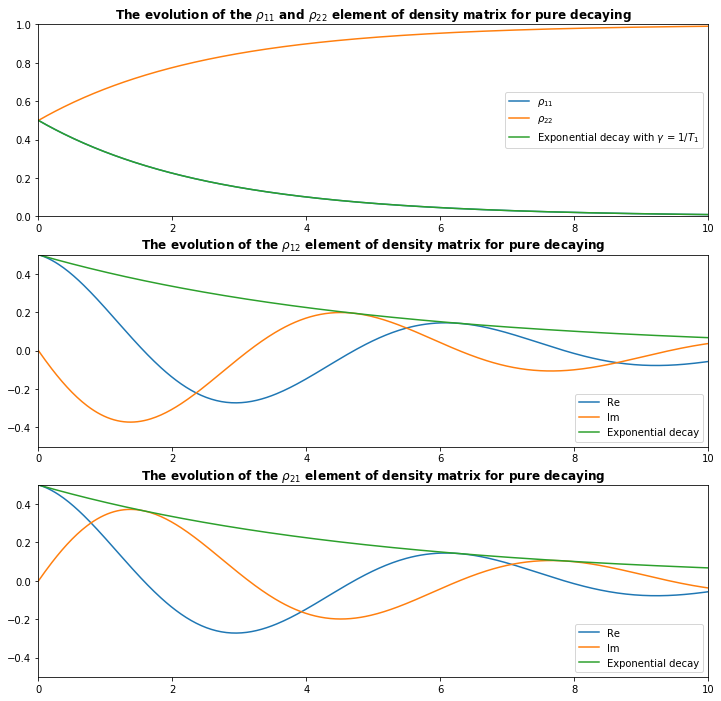

In [7]:
gamma = 0.4
w_l = 1
C_ops = [np.sqrt(gamma)*sigmam()]
H = 0.5 * w_l * sigmaz()
result = mesolve(H, psi2, times, C_ops)
exp_decay_off_diag = 0.5*np.exp(-gamma/2*times)
exp_decay_diag = 0.5*np.exp(-gamma*times)


figure_size =  [12,12]
plt.figure(figsize = figure_size)

plt.subplot(311)
plt.title(r'The evolution of the $\rho_{11}$ and $\rho_{22}$ element of density matrix for pure decaying' \
           ,weight="bold")
plt.ylim(0, 1)
plt.xlim(tmin, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
plt.plot(times,np.real(expect(result.states, projection(2,1,1))), label=r'$\rho_{22}$');
plt.plot(times,exp_decay_diag, label=r'Exponential decay with $\gamma$ = $1/T_1$');
plt.legend()

plt.subplot(312)
plt.title(r'The evolution of the $\rho_{12}$ element of density matrix for pure decaying',weight="bold")
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label='Re');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label='Im' );
plt.plot(times,exp_decay_off_diag, label='Exponential decay');
plt.legend(loc = 4)

plt.subplot(313)
plt.title(r'The evolution of the $\rho_{21}$ element of density matrix for pure decaying',weight="bold")
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label='Re');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label='Im');
plt.plot(times,exp_decay_off_diag, label='Exponential decay');
plt.legend(loc = 4)